In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load data
df = pd.read_csv('SalesData.csv')

In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,20/03/2024,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,20/04/2024,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,17/10/2023,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,09/08/2024,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,21/05/2024,Express,Accessory,35.56


In [3]:
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [4]:
# Total revenue
total_revenue = df["Total Price"].sum()
print(f"Total Revenue: {total_revenue:,.2f}")

Total Revenue: 63,602,668.37


In [5]:
df.dropna(subset=['Gender'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        19999 non-null  int64  
 1   Age                19999 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     19999 non-null  object 
 4   Product Type       19999 non-null  object 
 5   SKU                19999 non-null  object 
 6   Rating             19999 non-null  int64  
 7   Order Status       19999 non-null  object 
 8   Payment Method     19999 non-null  object 
 9   Total Price        19999 non-null  float64
 10  Unit Price         19999 non-null  float64
 11  Quantity           19999 non-null  int64  
 12  Purchase Date      19999 non-null  object 
 13  Shipping Type      19999 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       19999 non-null  float64
dtypes: float64(3), int64(4), ob

In [7]:
# This bit of code is sourced via ChatGPT (model GPT-4o) for speed, then adapted for my use
# Prompt: "To make python graphs look neater, I want to avoid graphs saying 1e6 and instead say K for thousands, M for millions, ect, as appropriate."

import matplotlib.ticker as mticker

# Function to format axis labels
def human_format(num, pos):
    if num >= 1_000_000:
        return f'{num/1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num/1_000:.1f}K'
    return str(num)

formatter = mticker.FuncFormatter(human_format)

In [8]:
# Average spending by customer demographic: Do certain types of customer spend more on average than others? 

# Average spending by age
age_bins = [18, 30, 40, 50, 60, 70, 80, 90] # make bins and bin lables
age_labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False) #split into bins
age_counts = df["Age Group"].value_counts().reindex(age_labels) # put into the correct order
age_spending = df.groupby("Age Group")["Total Price"].mean()
print(age_spending)

# Average spending by gender
gender_counts = df["Gender"].value_counts()
gender_spending = df.groupby("Gender")["Total Price"].mean()
print(gender_spending)

# Average spending by loyalty
loyalty_counts = df["Loyalty Member"].value_counts()
loyalty_spending = df.groupby("Loyalty Member")["Total Price"].mean()
print(loyalty_spending)

Age Group
18-29    3163.811734
30-39    3203.416390
40-49    3126.642604
50-59    3231.036414
60-69    3175.068186
70-79    3181.502827
80+      3217.952803
Name: Total Price, dtype: float64
Gender
Female    3194.019113
Male      3166.943730
Name: Total Price, dtype: float64
Loyalty Member
No     3191.974915
Yes    3138.010781
Name: Total Price, dtype: float64


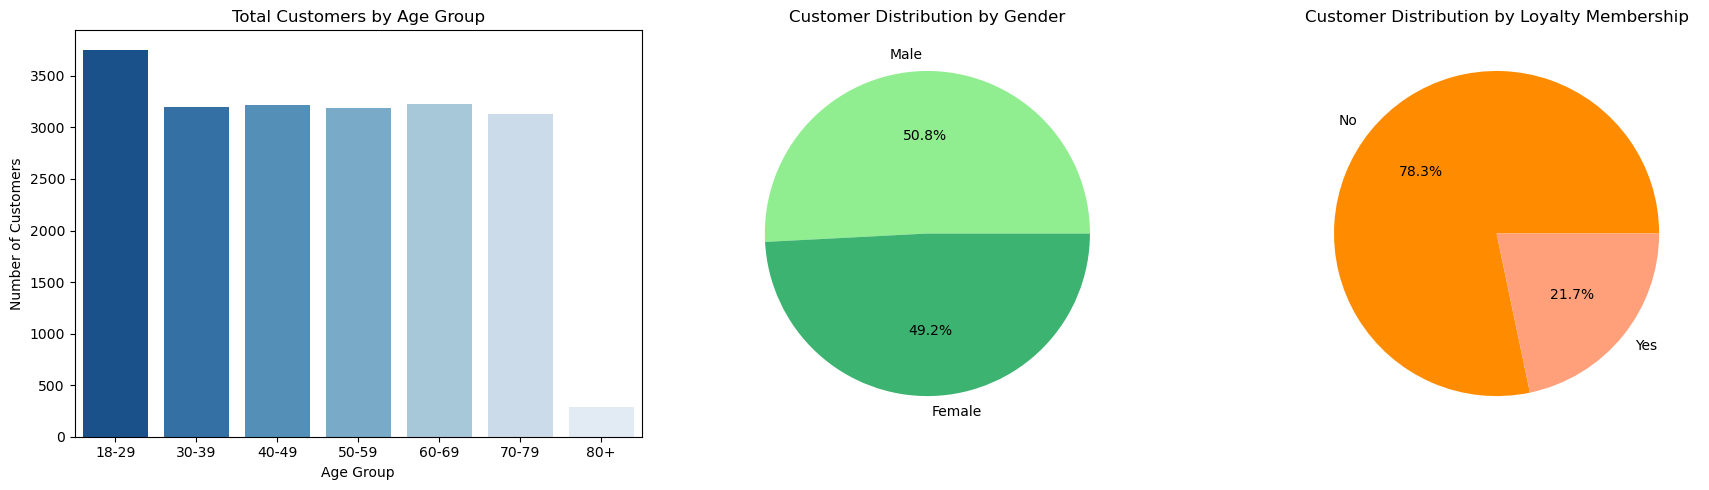

In [9]:
# plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=age_counts.index, y=age_counts.values, ax=axes[0], hue=age_counts.index, palette="Blues_r", legend=False)
axes[0].set_title("Total Customers by Age Group")
axes[0].set_ylabel("Number of Customers")
axes[0].set_xlabel("Age Group")

axes[1].pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["lightgreen", "mediumseagreen"])
axes[1].set_title("Customer Distribution by Gender")

axes[2].pie(loyalty_counts, labels=loyalty_counts.index, autopct="%1.1f%%", colors=["darkorange", "lightsalmon"])
axes[2].set_title("Customer Distribution by Loyalty Membership")

plt.tight_layout()
plt.show()

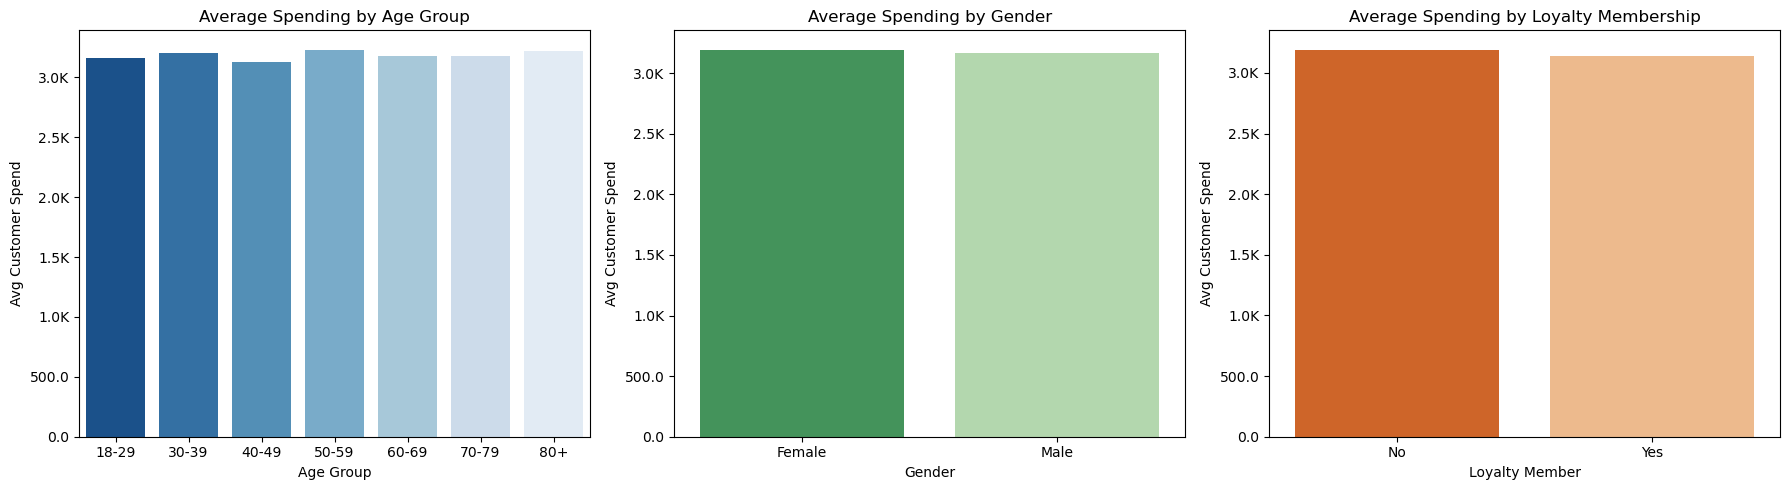

In [10]:
# plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=age_spending.index, y=age_spending.values, ax=axes[0], hue=age_spending.index, palette="Blues_r")
axes[0].set_title("Average Spending by Age Group")
axes[0].set_ylabel("Avg Customer Spend")
axes[0].set_xlabel("Age Group")
axes[0].yaxis.set_major_formatter(formatter)

sns.barplot(x=gender_spending.index, y=gender_spending.values, ax=axes[1], hue=gender_spending.index, palette="Greens_r")
axes[1].set_title("Average Spending by Gender")
axes[1].set_ylabel("Avg Customer Spend")
axes[1].yaxis.set_major_formatter(formatter)

sns.barplot(x=loyalty_spending.index, y=loyalty_spending.values, ax=axes[2], hue=loyalty_spending.index, palette="Oranges_r")
axes[2].set_title("Average Spending by Loyalty Membership")
axes[2].set_ylabel("Avg Customer Spend")
axes[2].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [11]:
# Product type statistics: what products are sold the most and which make the most money?

# Top-selling products (by quantity sold)
product_quantity = df.groupby("Product Type")["Quantity"].sum().sort_values(ascending=False)
print(product_quantity)

# Top-selling products (by sales revenue)
product_revenue = df.groupby("Product Type")["Total Price"].sum().sort_values(ascending=False)
print(product_revenue)

# Average rating of each product type
product_ratings = df.groupby("Product Type")["Rating"].mean().sort_values(ascending=False)
print(product_ratings)

Product Type
Smartphone    32660
Tablet        22653
Smartwatch    21631
Laptop        21583
Headphones    11183
Name: Quantity, dtype: int64
Product Type
Smartphone    21516754.69
Smartwatch    14036273.06
Laptop        12295565.65
Tablet        11712000.41
Headphones     4041400.24
Name: Total Price, dtype: float64
Product Type
Smartphone    3.319003
Tablet        3.016326
Smartwatch    2.994408
Headphones    2.993536
Laptop        2.984642
Name: Rating, dtype: float64


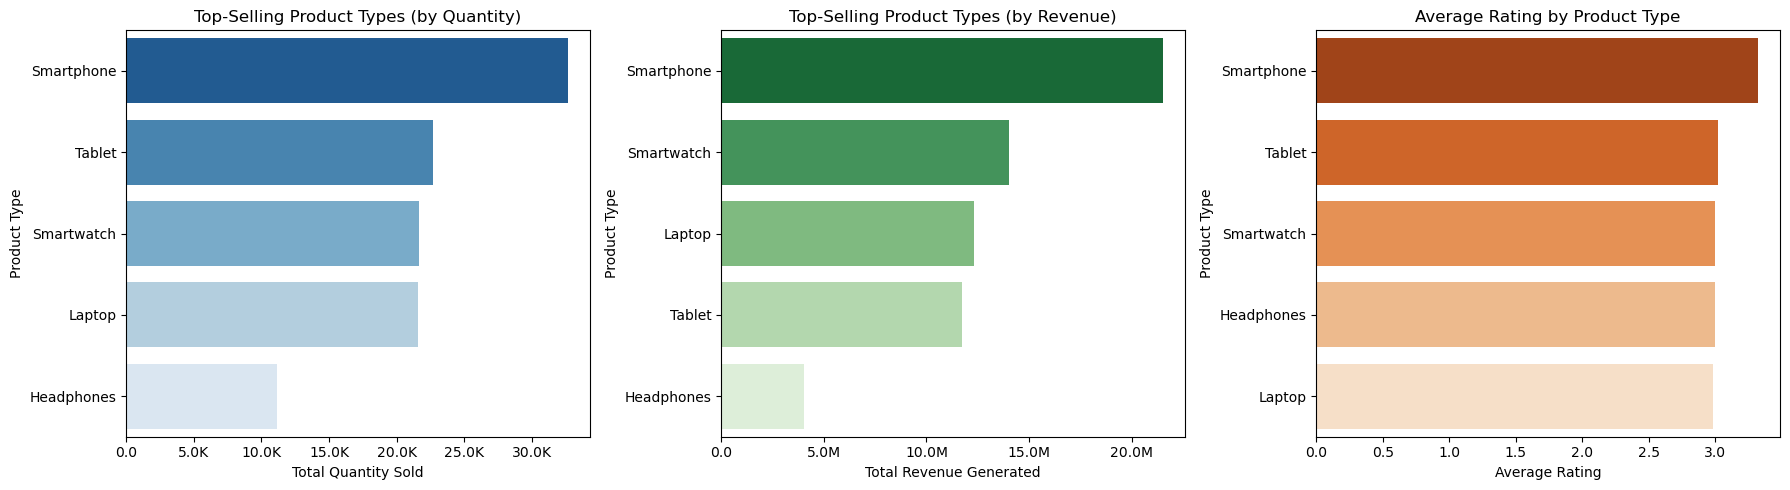

In [12]:
# plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=product_quantity.values, y=product_quantity.index, ax=axes[0], hue=product_quantity.index, palette="Blues_r")
axes[0].set_title("Top-Selling Product Types (by Quantity)")
axes[0].set_xlabel("Total Quantity Sold")
axes[0].xaxis.set_major_formatter(formatter)

sns.barplot(x=product_revenue.values, y=product_revenue.index, ax=axes[1], hue=product_revenue.index, palette="Greens_r")
axes[1].set_title("Top-Selling Product Types (by Revenue)")
axes[1].set_xlabel("Total Revenue Generated")
axes[1].xaxis.set_major_formatter(formatter)

sns.barplot(x=product_ratings.values, y=product_ratings.index, ax=axes[2], hue=product_ratings.index, palette="Oranges_r")
axes[2].set_title("Average Rating by Product Type")
axes[2].set_xlabel("Average Rating")

plt.tight_layout()
plt.show()

In [13]:
# sales date analysis: how did sales vary over the year and over a week?

# make sure in datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Monthly Sales
df['Month'] = df['Purchase Date'].dt.to_period('M')  # get the month
monthly_sales = df.groupby("Month")["Total Price"].sum()
print(monthly_sales)

# Weekly Sales
df['Weekday'] = df['Purchase Date'].dt.day_name()  # get day of the week
weekday_sales = df.groupby("Weekday")["Total Price"].sum()
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales = weekday_sales.reindex(weekday_order)  # put into correct order
print(weekday_sales)

Month
2023-09     481961.79
2023-10    2318466.35
2023-11    2068434.14
2023-12    1980700.33
2024-01    6619498.15
2024-02    5733696.06
2024-03    6324367.84
2024-04    6418253.62
2024-05    6709042.93
2024-06    6668633.59
2024-07    6535129.52
2024-08    6706118.61
2024-09    5037691.12
Freq: M, Name: Total Price, dtype: float64
Weekday
Monday       9228340.61
Tuesday      9084793.74
Wednesday    9244690.88
Thursday     8793363.26
Friday       9151524.22
Saturday     9151021.73
Sunday       8948259.61
Name: Total Price, dtype: float64


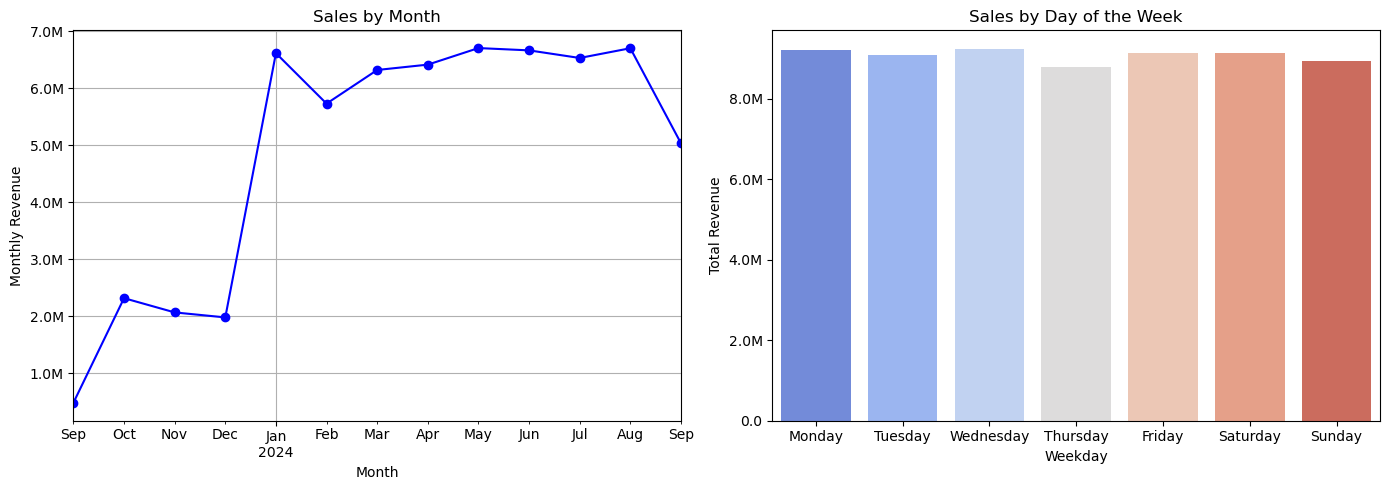

In [14]:
# plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

monthly_sales.plot(kind="line", marker="o", ax=axes[0], color="b")
axes[0].set_title("Sales by Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Monthly Revenue")
axes[0].grid(True)
axes[0].yaxis.set_major_formatter(formatter)

sns.barplot(x=weekday_sales.index, y=weekday_sales.values, ax=axes[1], hue=weekday_sales.index, palette="coolwarm")
axes[1].set_title("Sales by Day of the Week")
axes[1].set_xlabel("Weekday")
axes[1].set_ylabel("Total Revenue")
axes[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [15]:
# Customer retention: are there more repeat customers? and do they spend more?

# Repeat customers vs. one-time customers
customer_purchases = df.groupby("Customer ID")["Total Price"].count()
repeat_customers = customer_purchases[customer_purchases > 1].index
one_time_customers = customer_purchases[customer_purchases == 1].index
repeat_customers_count = customer_purchases[customer_purchases > 1].count()
one_time_customers_count = customer_purchases[customer_purchases == 1].count()

# Average spending by repeat/one-time
repeat_customers_spend = df[df["Customer ID"].isin(repeat_customers)]["Total Price"]
one_time_customers_spend = df[df["Customer ID"].isin(one_time_customers)]["Total Price"]

spend_comparison = pd.DataFrame({
    "Customer Type": ["Repeat Customers", "One-Time Customers"],
    "Average Spend": [repeat_customers_spend.mean(), one_time_customers_spend.mean()]
})

spend_comparison

,Customer Type,Average Spend
0,Repeat Customers,3198.594887
1,One-Time Customers,3143.334928


In [16]:
#print(customer_purchases)
#print(repeat_customers)
#print(one_time_customers)
#print(repeat_customers_count)
#print(one_time_customers_count)

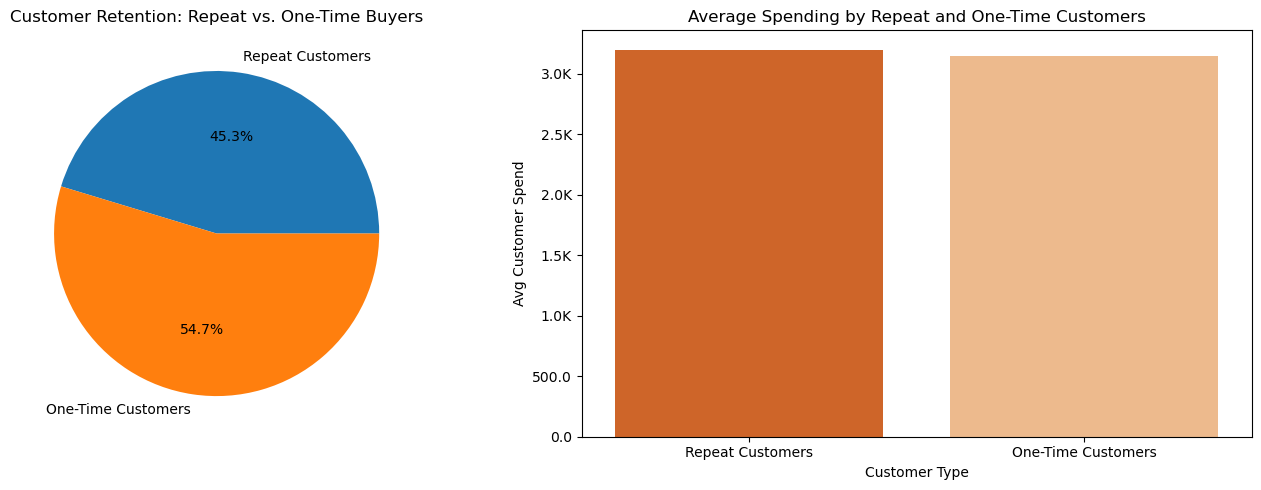

In [17]:
# plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

labels = ["Repeat Customers", "One-Time Customers"]
sizes = [repeat_customers_count, one_time_customers_count]
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%')
axes[0].set_title("Customer Retention: Repeat vs. One-Time Buyers")

sns.barplot(x="Customer Type", y="Average Spend", data=spend_comparison, ax=axes[1], hue="Customer Type", palette="Oranges_r")
axes[1].set_title("Average Spending by Repeat and One-Time Customers")
axes[1].set_ylabel("Avg Customer Spend")
axes[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [18]:
# Which customers put in the most orders?
# Top 10 customers by total spent
top_customers = df.groupby("Customer ID")["Total Price"].sum().sort_values(ascending=False).head(10)
print(top_customers)

Customer ID
16357    34563.70
16863    33035.92
13813    31830.16
11476    31077.61
12276    30961.18
13635    30260.36
12749    29394.56
15399    29084.88
12319    27352.32
19996    27296.78
Name: Total Price, dtype: float64


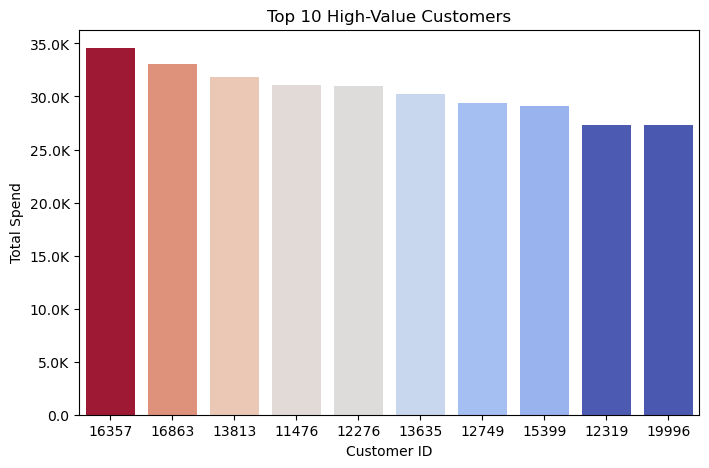

In [19]:
# plots
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.index, y=top_customers.values, order=top_customers.index, legend=False, hue=top_customers.values, palette="coolwarm")
plt.title("Top 10 High-Value Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()